# Scalability

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import os

## Load Data

In [38]:
experiments = ["scalability_repeat", "scalability-05-05", "scalability_xl", "scalability_distributed"]

### Scalability Results

In [39]:
dfs = [pd.read_csv(f"../results/{directory}/results.csv") for directory in experiments]

### Combine Results

In [40]:
def get_dataset_length(dataset_name: str) -> int:
    return int(dataset_name.split(".")[0].split("-")[1])

def get_dataset_width(dataset_name: str) -> int:
    return int(dataset_name.split(".")[0].split("-")[2])

In [41]:
df = pd.concat(dfs, ignore_index=True)

In [42]:
with_dataset = df.loc[~df.dataset.isna()]
df.loc[~df.dataset.isna(), "dataset_length"] = with_dataset.dataset.apply(get_dataset_length)
df.loc[~df.dataset.isna(), "dataset_width"] = with_dataset.dataset.apply(get_dataset_width)

## Plot

In [44]:
sns.set(rc={"figure.figsize":(20, 10)})

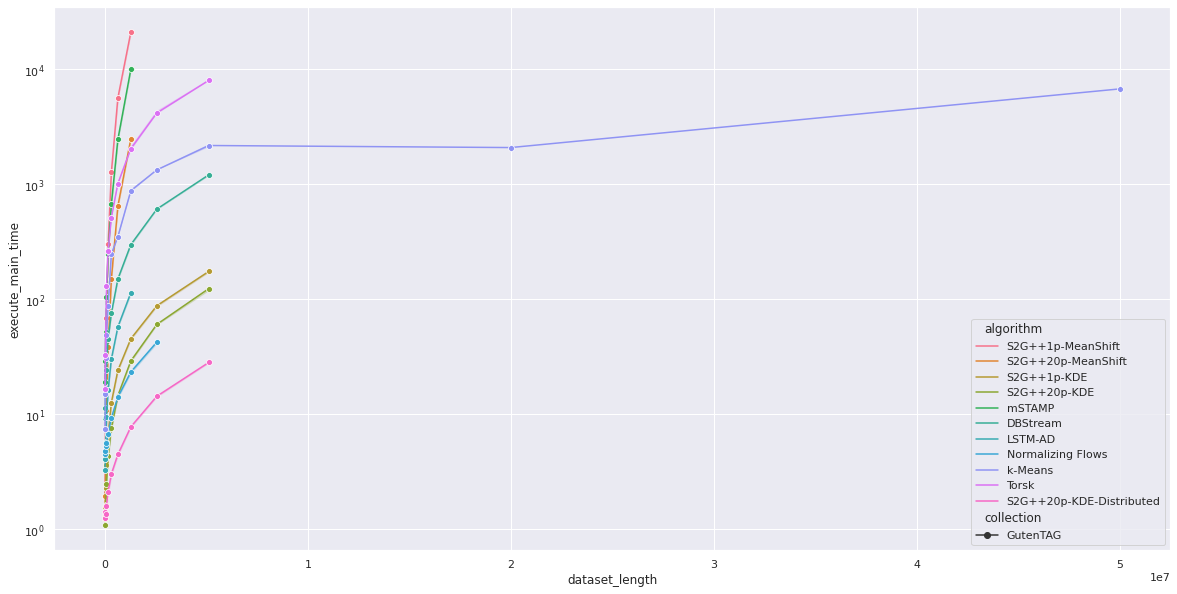

In [45]:
g = sns.lineplot(data=df[(df.dataset_width == 1)], x="dataset_length", y="execute_main_time", hue="algorithm", style="collection", markers=True)
g.set(yscale="log");

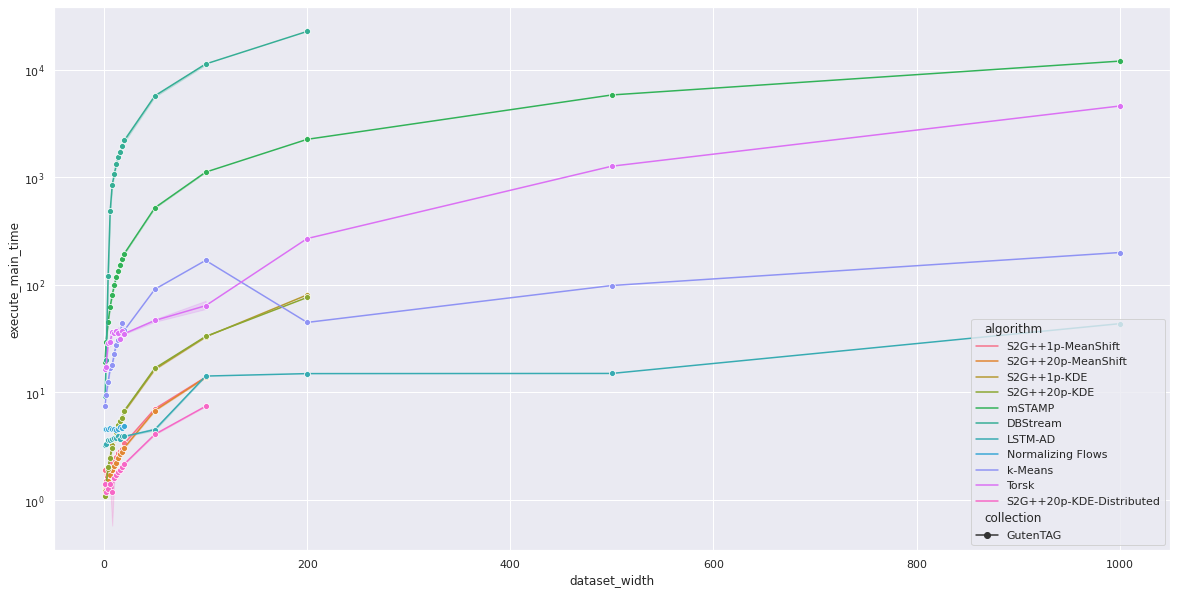

In [46]:
g = sns.lineplot(data=df[(df.dataset_length == 10000)], x="dataset_width", y="execute_main_time", hue="algorithm", style="collection", markers=True)
g.set(yscale="log");

### Export

In [51]:
df[(df.dataset_length == 10000) & (df.dataset_width <= 100)].pivot_table(index="algorithm", columns="dataset_width", values="execute_main_time").transpose().reset_index()#.to_csv("scalability.width.csv", index=False)

algorithm,dataset_width,DBStream,LSTM-AD,Normalizing Flows,S2G++1p-KDE,S2G++1p-MeanShift,S2G++20p-KDE,S2G++20p-KDE-Distributed,S2G++20p-MeanShift,Torsk,k-Means,mSTAMP
0,1.0,9.348548,3.285656,4.542789,1.222799,1.900377,1.100585,1.410000,1.314431,16.687693,7.525909,19.076552
1,2.0,20.218186,3.338425,4.557958,1.384514,1.491546,1.386778,1.180000,1.292042,17.223639,9.507492,29.671139
2,4.0,121.270506,3.611283,4.598651,1.942863,1.764861,2.030583,1.263333,1.492026,28.705166,12.466205,45.192571
3,6.0,480.991906,3.601777,4.688352,2.536778,2.108314,2.488508,1.403333,1.716266,29.356189,16.787877,62.524116
4,8.0,844.258045,3.665853,4.620951,3.231530,2.262775,3.080172,1.186667,1.897295,36.366330,17.884075,80.238019
5,10.0,1062.226804,3.743560,4.535081,3.646543,2.393587,3.731723,1.603333,2.085258,35.717599,22.850007,98.652406
6,12.0,1312.904458,3.793131,4.525185,4.211886,2.533869,4.339612,1.713333,2.212343,37.292589,27.878340,117.647396
7,14.0,1523.287297,3.943556,4.625225,4.898289,2.749999,4.947321,1.816667,2.450368,35.601834,30.702414,134.931476
8,16.0,1723.310409,3.711128,4.745351,5.399578,2.839086,5.421519,1.923333,2.662336,31.660951,NaN,153.337638
9,18.0,1955.423073,3.940604,4.694512,5.713926,3.010532,5.788662,2.036667,2.823717,37.374691,44.525697,175.405870


In [49]:
df[(df.dataset_width == 1) & (df.dataset_length <= 5120000)].pivot_table(index="algorithm", columns="dataset_length", values="execute_main_time").transpose().reset_index().to_csv("scalability.length.csv", index=False)